In [1]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt


In [2]:
1/1.36

0.7352941176470588

In [3]:
10**(0.32*-0.3*(-20+20+0.26*9)+2.34)

130.4247461159109

In [4]:
def Trans_IGM(dv, z):
    dv = dv.to(u.km/u.s)
    opacity = 2.3 * (600 * (u.km/u.s) / dv) * ((1 + z) / 10) ** (3 / 2)
    T = np.e ** -opacity
    T[dv < 0] = 0  # Set transmission to 0 for dv < 0
    return T

In [5]:
from astropy.constants import G
from astropy.cosmology import Planck18 as cosmo

# Define the Hubble constant at redshift 9
H_z9 = cosmo.H(9).to(u.s**-1)
MH=(10.9 * u.M_sun).to(u.kg)
G=G.to(u.m**3/u.kg/u.s**2)
# Calculate v
v = (10 * G * MH * H_z9)**(1/3)
print(v)

82.46364347543123 m / s


In [11]:
10**2.39

245.4708915685031

100.00000000000001


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


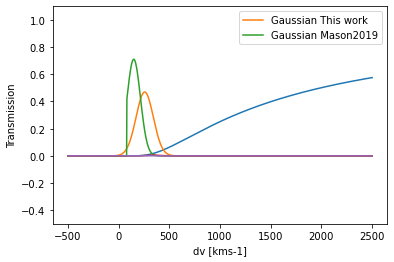

0.876508736433639  % transmitted in ours
0.10968780217391765 s / km  % transmitted in Mason2019
Ratio: 7.990940825342397 km / s


In [ ]:
from scipy.integrate import simps
from scipy.signal import convolve


redshift=9

dv=np.linspace(-500,2500,1000)*u.km/u.s

T=Trans_IGM(dv,redshift)


def Gaussian(x,A,mu,FWHM):
    sigma=FWHM/2.355
    A=A*u.km/u.s
    return A/(sigma*np.sqrt(2*np.pi))*np.e**(-(x-mu)**2/(2*sigma**2))

plt.plot(dv,T)
plt.xlabel('dv [kms-1]')
plt.ylabel('Transmission')
plt.ylim(-0.5,1.1)


mean = 258 * u.km/u.s
fwhm = 250 * u.km/u.s
A=100
our_gaussian = Gaussian(dv, A, mean, fwhm)

plt.plot(dv, our_gaussian, label='Gaussian This work')

c_mean = 150 * u.km/u.s
c_fwhm = 155 * u.km/u.s
c_A=100
c_gaussian = Gaussian(dv, c_A, c_mean, c_fwhm)
c_gaussian[dv < 82* u.km/u.s] = 0

c_gaussian/=np.trapz(c_gaussian,dv)
c_gaussian=c_gaussian*100
print(np.trapz(c_gaussian,dv))



plt.plot(dv, c_gaussian, label='Gaussian Mason2019')
plt.legend()


def Transmitted_lya(dv,T,profile):
    transmitted=T*profile
    return transmitted

def integrate_Trans(dv,T,profile):
    transmitted=T*profile
    return np.trapz(transmitted,dv)*u.s/u.km


plt.plot(dv,Transmitted_lya(dv,T,our_gaussian),label='Transmitted')
plt.plot(dv,Transmitted_lya(dv,T,c_gaussian),label='Transmitted')
plt.show()

print(integrate_Trans(dv,T,our_gaussian), " % transmitted in ours")
print(integrate_Trans(dv,T,c_gaussian), " % transmitted in Mason2019")
print("Ratio:",integrate_Trans(dv,T,our_gaussian)/integrate_Trans(dv,T,c_gaussian))

In [35]:
integrated_c_gaussian = np.trapz(c_gaussian,dv)


In [59]:
10.9**1/3

3.6333333333333333

In [36]:
integrated_c_gaussian

<Quantity 99.81796188 km / s>

In [44]:
a=[238,250,429,160,725,233,385,351,169,297,242,237,286,408,232,342,210,589,242,179,73,85,115,86,251,77,261,163,79,119,310,140,60,193,326,273,113,201,147,234,111,177,135,258,186,156,236,263,470,249,263,186,227,318,161,119,62,219,330,188,253,235,154,91,136,285,360,130,335,295,147,215,210,222,278,216,133,232,100]

In [46]:
np.mean(a)

225.9620253164557